In [1]:
import random
import utils
import numpy as np
import matplotlib.pyplot as plt

# Agent class definition

## Q-Learning Agent

In [2]:
class QAgent():# LeducGame class definition
    qtable=[]
 # Agent class definition   state=None
    learning_rate=0.1
    actions=[]
    state_number=6
    perf=[]
    
    def __init__(self, game):
        self.qtable=np.zeros((self.state_number,len(game.actions)))
        self.game=game
        self.perf=[]
    #allow to print leduc game state
    def __str__(self):
        return "State = {} \nQTable = {} \nLearning rate = {}".format(self.state,self.qtable,self.learning_rate)
    
    def get_action(self):
        action=random.randrange(0,2)
        return action
    
    def set_state(self):
        self.state=self.game.get_player1state()
        
    def set_qtable(self,qtable):
        self.qtable=qtable
    
    def update(self,action):
        reward=self.game.play(action)
        new_value = (1 - self.learning_rate) * self.qtable[self.state, action] +  self.learning_rate * reward
        self.qtable[self.state, action] = new_value
        
    def evaluate(self,game,n):
        reward=0
        for i in range(0,n):
            state=game.get_player1state()
            action=utils.get_max_list(self.qtable[state])
            reward+=game.play(action)
        self.perf.append(float(reward/n))
        

## Random Agent

In [3]:
class RandAgent():
    state=None
    actions=[]
    perf=[]
    
    def set_state(self):
        self.state=self.game.get_player1state()

    def evaluate(self,game,n):
        reward=0
        for i in range(0,n):
            state=game.get_player1state()
            action=self.get_action()
            reward+=game.play(action)
        self.perf.append(float(reward/n))
        
    def __init__(self, game):
        self.game=game
        self.perf=[]
        
    def __str__(self):
        return "State = {}".format(self.state)
    
    def get_action(self):
        action=random.randrange(0,2)
        return action
    

# LeducGame class definition

In [4]:
class LeducGame:
    deck = []
    actions = [0,1] #0 is fold and 1 is push
    firstplayer=None; #0 if player1 and 1 if player2
    player1card=0;
    player2card=0;
    boardcard=0;
    result=0;
    player2action=0;
    
    #inititate a game
    def __init__(self):
        self.deck = [0,0,1,1,2,2]
        
        #deal card to game from deck
        self.player1card=utils.choose_and_remove(self.deck)
        self.player2card=utils.choose_and_remove(self.deck)
        self.boardcard=utils.choose_and_remove(self.deck)
        self.result=self.get_result()
        self.firstplayer=random.randrange(0,2)
        
        self.player2action=1;

    #allow to print leduc game state
    def __str__(self):
        return "Player1 = {} \nPlayer2 = {} \nBoard = {} \nDeck = {}\nResult = {}".format(self.player1card,self.player2card,self.boardcard,self.deck, self.result)
    
    #reset to a new game state
    def reset(self):
        self.deck = [0,0,1,1,2,2]
        
        #deal card to game from deck
        self.player1card=utils.choose_and_remove(self.deck)
        self.player2card=utils.choose_and_remove(self.deck)
        self.boardcard=utils.choose_and_remove(self.deck)
        self.result=self.get_result()
        
        self.player2action=1;
        
    #result() : 
    # 0  -> draw
    # 1  -> player1 win
    #-1  -> player2 win
    def get_result(self):
        #Pairs
        if (self.player1card==self.boardcard):
            result=1
        elif (self.player2card==self.boardcard):
            result=-1
        #Highest card
        elif (self.player1card>self.player2card):
            result=1
        elif(self.player1card<self.player2card):
            result=-1
        #Draw
        else:
            result=0
        return result
            
    def get_player1state(self):
        if self.player2action is None:
            return self.player1card
        else:
            return self.player1card+3
    
    def play(self,action):
        r=0
        if(action==self.player2action and action==1):
            if(self.result==1):
                r=1
            elif(self.result==-1):
                r=-1
        elif(action<self.player2action):
            if(self.result==1):
                r=-1
            elif(self.result==-1):
                r=1
        self.reset()
        return r          

# Testing LeducGame

In [5]:
game=LeducGame()
print(game)

Player1 = 0 
Player2 = 0 
Board = 1 
Deck = [1, 2, 2]
Result = 0


# Creating the QTable

<img src="qtable.png" />.

In [6]:
state_number=6
qtable=np.zeros((state_number,2))
print(qtable)

[[0. 0.]
 [0. 0.]
 [0. 0.]
 [0. 0.]
 [0. 0.]
 [0. 0.]]


# Learning alg

In [7]:
epochs_number=1000
evaluate_every=100
evaluation=[]
agent=QAgent(game)

for i in range(0, epochs_number):

    if(i % evaluate_every == 0):
        eval_game=LeducGame()
        agent.evaluate(eval_game,10000)
 
    agent.set_state()
    action = agent.get_action() # Explore action space
    agent.update(action)

print(agent.qtable)

[[ 0.          0.        ]
 [ 0.          0.        ]
 [ 0.          0.        ]
 [ 0.56081088 -0.07503156]
 [-0.02243458  0.34219688]
 [-0.52681387  0.42691459]]


# Plotting results

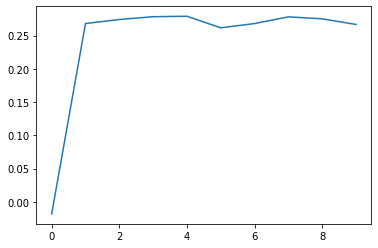

In [8]:
plt.plot(agent.perf)

# Rand alg

In [12]:
epochs_number=1000
evaluate_every=100

# Learning algte_every=1
evaluation=[]
agent=RandAgent(game)

for i in range(0, epochs_number):

    if(i % evaluate_every == 0):
        eval_game=LeducGame()
        agent.evaluate(eval_game,10000)
 
    agent.set_state()
    action = agent.get_action() # Explore action space

# Plotting results

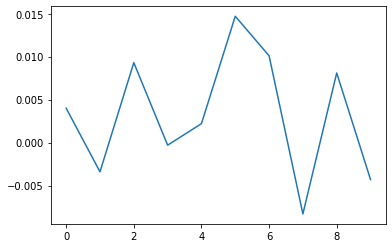

In [13]:
plt.plot(agent.perf)